In [1]:
from modules.data_types import Transmission
from modules.utils import get_proportions
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
# Load data
trn = Transmission.from_hdf5('./data/hier_clustering_neuronal_proportions.ptrn')

In [3]:
trn.plot_state

{'xs_name': 'cell_name',
 'ys_name': 'FCLUSTER_LABELS',
 'percentages': True,
 'use_barplot': False,
 'use_heatmap': True,
 'heatmap_cmap': 'viridis',
 'type': 'ProportionsWidget'}

In [4]:
# Get proportions dataframe
props_df = get_proportions(xs=trn.df.cell_name, ys=trn.df.FCLUSTER_LABELS, xs_name='cell_name', ys_name='FCLUSTER_LABELS')
props_df.columns = props_df.columns.get_level_values(-1)

In [5]:
props_df.fillna(value=0, inplace=True)

In [6]:
# Remove cells that appear only once or are ependymal cells
props_df.drop(['cor_ass_bvin', 'dcen', 'mn', 'pr_amg', 'vac_in', 'ependymal'], axis='index', inplace=True)

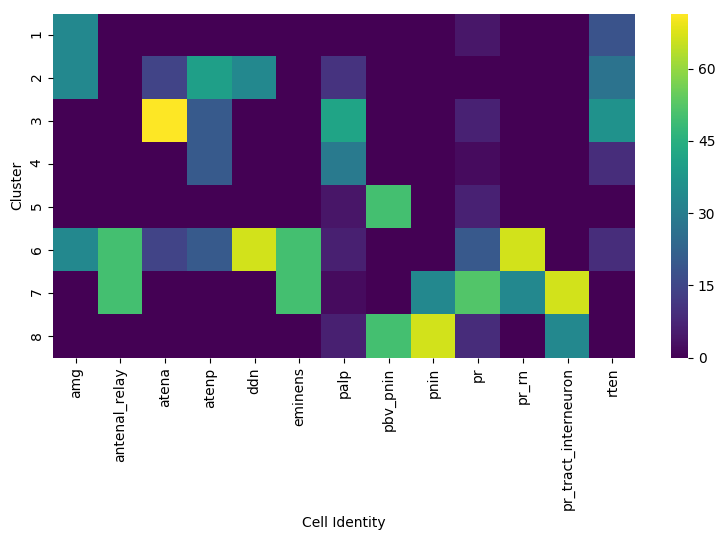

In [7]:
fig = plt.figure(figsize=(8,5.5), dpi=100)
hm = sns.heatmap(props_df.T, cmap='viridis')
hm.set_ylabel('Cluster')
hm.set_xlabel('Cell Identity')
plt.tight_layout()

In [8]:
fig.savefig('./figs/proportions_neuronal_data.png', dpi=1200)

In [9]:
# Compute linkage to group together cells exhibiting similar activity modes and separate cells exhibiting disparate modes
Z = linkage(props_df, optimal_ordering=True, method='complete', metric='euclidean')

# Fig 4e

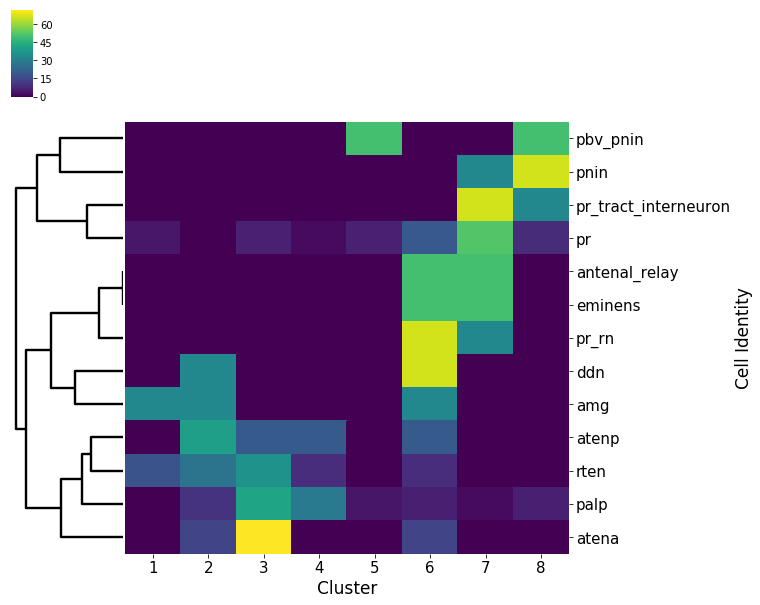

In [10]:
cm = sns.clustermap(data=props_df, row_linkage=Z, col_cluster=False, cmap='viridis')
cm.ax_heatmap.set_xlabel('Cluster', fontdict={'fontsize': 17})
cm.ax_heatmap.set_ylabel('Cell Identity', fontdict={'fontsize': 17})

xtl = cm.ax_heatmap.get_xticklabels()
cm.ax_heatmap.set_xticklabels(xtl, fontdict={'fontsize': 15})

ytl = cm.ax_heatmap.get_yticklabels()
cm.ax_heatmap.set_yticklabels(ytl, fontdict={'fontsize': 15})
plt.show()

In [11]:
cm.savefig('./figs/proportions_dendrogram_neuronal_data.png', dpi=1200)